In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler    
from sklearn.metrics import confusion_matrix

In [84]:
data = pd.read_csv('kanser.csv')    
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [85]:
data.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [86]:
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis] # M=1, B=0

In [87]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [88]:
y = data.diagnosis.values # diagnosis sütununu y değişkenine atadık // we assign the diagnosis column to the y variable
x = data.drop(['diagnosis'],axis=1) # diagnosis sütununu x değişkenine atadık // we assign the diagnosis column to the x variable

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state=33) # veri setini train ve test olarak ayırdık // we split the dataset as train and test

In [90]:
sc = StandardScaler() # verileri ölçeklendirmek için kullanıyoruz // we use it to scale the data    
Xtrain = sc.fit_transform(x_train) # train verilerini ölçeklendirdik  // we scaled the train data
xtest = sc.transform(x_test) # test verilerini ölçeklendirdik     // we scaled the test data

In [91]:
from sklearn.ensemble import RandomForestClassifier
kfold =KFold(n_splits=5, random_state=26,shuffle =True) # 10 katlı çapraz doğrulama yaptık // we did 10-fold cross validation
rf = RandomForestClassifier(n_estimators=100, random_state=33) # 100 tane karar ağacı oluşturduk // we created 100 decision trees

In [92]:
cv_score = cross_val_score(rf, Xtrain, y_train, cv=kfold) # 10 katlı çapraz doğrulama ile eğitim verilerini eğittik // we trained the training data with 10-fold cross validation


In [93]:
print("çapraz doğrulama skorları:",cv_score)    

çapraz doğrulama skorları: [0.95604396 0.96703297 0.94505495 0.94505495 0.96703297]


In [94]:
print("Accueracy %{}".format(cv_score.mean()*100)) # eğitim verilerinin doğruluk ortalamasını yazdırdık  // we printed the average accuracy of the training data

Accueracy %95.60439560439559


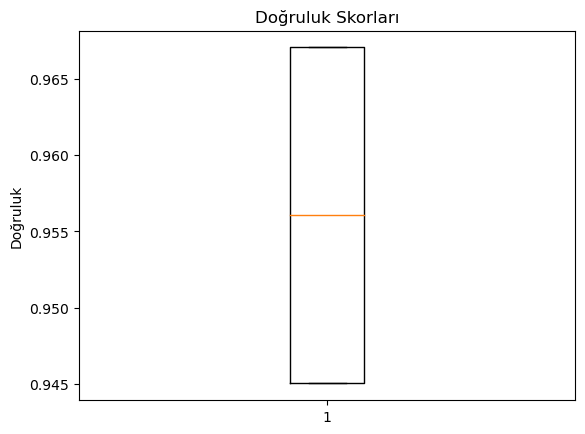

In [95]:
import matplotlib.pyplot as plt 
plt.boxplot(cv_score) # çapraz doğrulama skorlarını kutu grafiğinde gösterdik // we showed the cross validation scores in the box plot
plt.title("Doğruluk Skorları")
plt.ylabel("Doğruluk")
plt.show()